# Lezione 01

## Esercizio 1

### 1.1

Data la variabile aleatoria $r$ con distribuzione uniforme nell'intervallo $[0,1]$, utilizzando l'oggetto Random definito in random.h, è stato generato
un campione di $r$ di $M=10^5$ realizzazioni suddiviso in $N=100$ blocchi. La figura seguente mostra l'andamento della media di $r$ e la relativa incertezza in funzione del numero di realizzazioni.


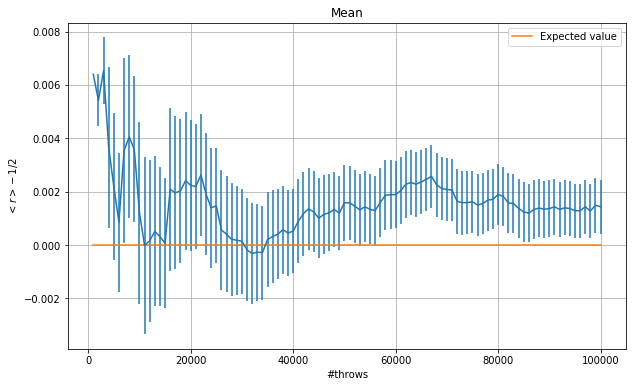

In [7]:
#plot <r>(N)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from scipy.special import erf

Nthrows, mean, error = np.loadtxt("data1.dat", usecols=(0,1,2), unpack=True)

plt.figure(figsize=(10,6))
plt.errorbar(Nthrows ,mean-0.5, yerr=error)
plt.plot(Nthrows, np.zeros(len(Nthrows)), label='Expected value')
plt.legend()
plt.xlabel('#throws')
plt.ylabel('$<r> - 1/2$')
plt.grid(True)


plt.title('Mean')
plt.show()

### 1.2

Consideriamo ora la variabile aleatoria $(r-1/2)^2$ con valore atteso $\mathbb{E}[(r-1/2)^2]=\sigma ^2_r = 1/12$. La figura seguente mostra l'andamento di $\sigma ^2 _r$ e la relativa incertezza in funzione del numero di realizzazioni.


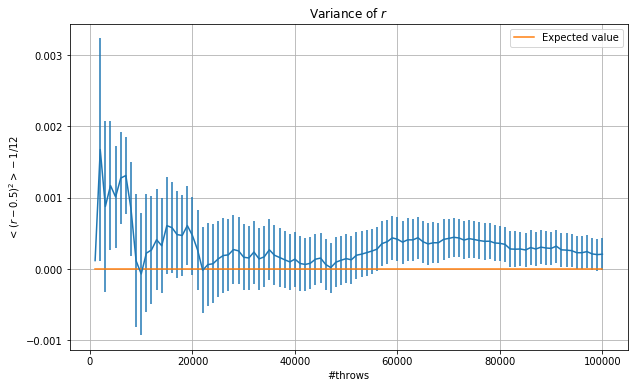

In [22]:
#plot sigma2(N)

Nthrows, mean, error = np.loadtxt("data2.dat", usecols=(0,1,2),unpack=True)

plt.figure(figsize=(10,6))
plt.errorbar(Nthrows ,mean-1./12, yerr=error)
plt.plot(Nthrows, np.zeros(len(Nthrows)), label='Expected value')
plt.legend()
plt.xlabel('#throws')
plt.ylabel('$<(r-0.5)^2>-1/12$')
plt.grid(True)
plt.title('Variance of $r$')
plt.show()

### 1.3

Consideriamo l'ipotesi nulla che un campione di $r$ ottenuto con il generatore di numeri pseudocasuali Random sia stato estratto da una distribuzione uniforme in $[0,1]$. Vogliamo deteterminare la probabilità di rigettare tale ipotesi mediante un test $\chi ^2$.

A tal scopo consideriamo un campione di $10^6$ realizzazioni di $r$,  suddiviso in $100$ blocchi e per ciascun blocco calcoliamo il $\chi ^2$.
Nella figura seguente è mostrato l'andamento del $\chi ^2$ rispetto al blocco considerato. 

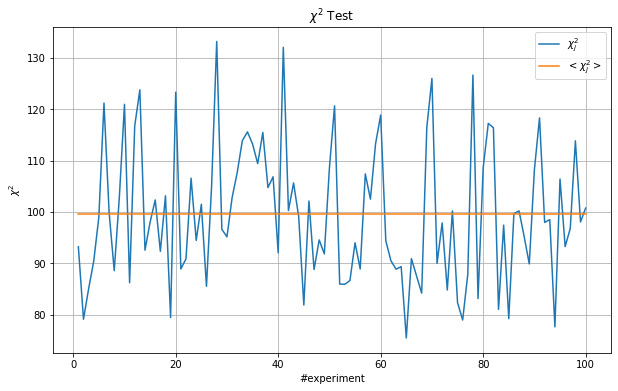

media = 99.5756
min chi2 = 75.46
max chi2 = 133.22


In [11]:
#plot Chi2

plt.figure(figsize=(10,6))

i, Chi = np.loadtxt("Chi2.dat", usecols=(0,1),unpack=True)
mean = np.mean(Chi)
means = np.array([mean for i in range(len(i))])
plt.plot(i, Chi, label='$\chi ^2 _j$')
plt.plot(i,means, label='$<\chi ^2 _j>$')
plt.xlabel('#experiment')
plt.ylabel('$\chi ^2$')
plt.grid(True)
plt.legend()
plt.title('$\chi ^2$ Test')
plt.show()

print("media = "+str(mean))
print("min chi2 = "+str(min(Chi)))
print("max chi2 = "+str(max(Chi)))


Per stabilire se rigettere o meno l'ipotesi di uniformità della distribuzione consideriamo una significatività $\alpha = 0.05$. 
Notiamo che il $\chi ^2$ medio osservato ($<\chi ^2 _j>=99.58$) corrisponde a un p-value nell'intervallo $[0.1,0.9]$ i cui estremi sono entrambi maggiori di $\alpha$, pertanto per valori osservati del $\chi ^2$ uguali o minori a quello medio non possiamo rigettare l'ipotesi nulla. Non possiamo dire lo stesso per alcuni blocchi del campione di $r$ con un $\chi ^2$ al di sopra della media. Ad esempio il $\chi ^2$ massimo osservato ($\chi ^2_{\text{max}}=133.22$) corriponde a un p-value nell'intervallo $[0.01, 0.025]$ i cui estremi sono minori di $\alpha$, in questo caso dobbiamo rigettare l'ipotesi di uniformità della distribuzione.


## Esercizio 2

Consideriamo tre distribuzioni di probabilità: quella uniforme discreta di una dado non truccato, un'esponenziale di media $\lambda = 1$ e una Cauchy-Lorentz di media $\mu = 0$ e $\Gamma =1$. Per ciascuna di queste distribuzioni, posta $x$ la variabile aleatoria associata, 
generiamo i campioni delle variabili aleatorie $S_N = \sum _{i=0} ^N x_i$ con $N={1,2,10,100}$. Ciascun campione contiene $10^4$ realizzazioni.
Nelle figure seguenti sono raffigurati gli istogrammi di tali campioni.

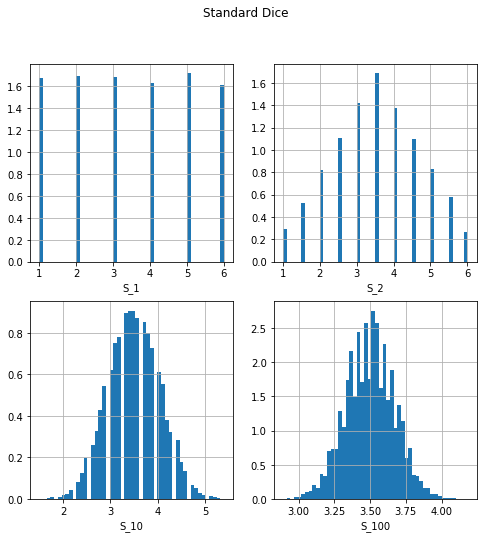

In [15]:
#plot dice

dice = np.loadtxt("Dice.dat", usecols=(0,1,2,3))
exp = np.loadtxt("Exp.dat", usecols=(0,1,2,3))
cl = np.loadtxt("CL.dat", usecols=(0,1,2,3))

plt.figure(figsize=(8,8))

n_bins = 50
N = np.array([1,2,10,100])

for i in range(4):

   plt.subplot(2,2,i+1)
   nd, binsd, patches = plt.hist( dice[:,i], n_bins, density=True, label='N = '+str(N[i]))
   plt.xlabel('S_'+str(N[i]))
   #plt.legend()
   plt.grid(True)

plt.suptitle('Standard Dice')
plt.show()

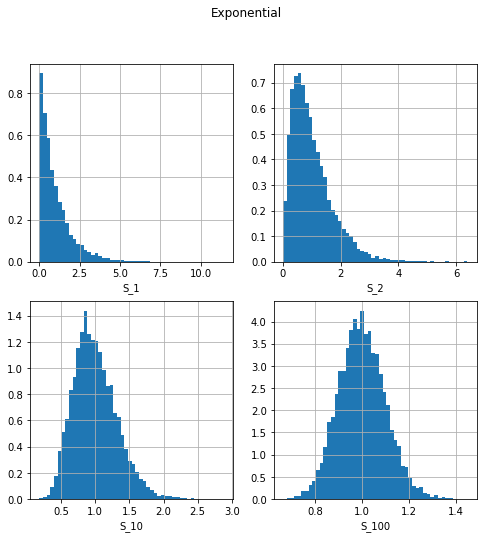

In [16]:
#plot exp

plt.figure(figsize=(8,8))

for i in range(4):

   plt.subplot(2,2,i+1)
   ne, binse, patches = plt.hist( exp[:,i], n_bins, density=True, label='N = '+str(N[i]))
   #plt.legend()
   plt.xlabel('S_'+str(N[i]))
   plt.grid(True)

plt.suptitle('Exponential')
plt.show()

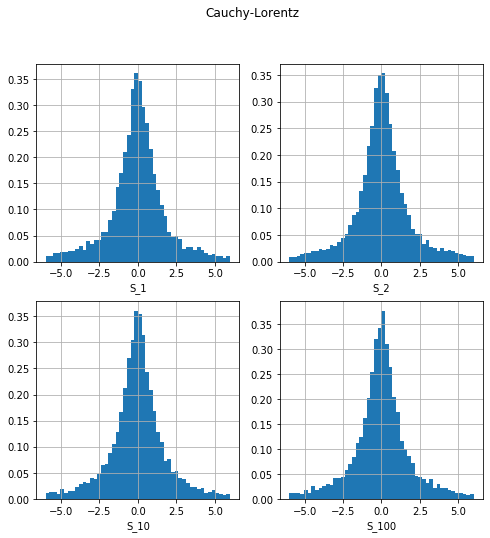

In [17]:
#plt cauchy

plt.figure(figsize=(8,8))

for i in range(4):

   plt.subplot(2,2,i+1)
   nc, binsc, patches = plt.hist( cl[:,i], n_bins, density=True, label='N = '+str(N[i]), range =(-6,6))
   #plt.legend()
   plt.xlabel('S_'+str(N[i]))
   plt.grid(True)

plt.suptitle('Cauchy-Lorentz')
plt.show()

Nei primi due casi osserviamo che il profilo della distribuzione varia con $N$ e assume la forma di una gaussiana, mentre nel terzo caso il profilo della distribuzione rimane immutato al variare di $N$. Allora nei tre casi, per $N=100$, eseguiamo dei fit delle frequenze relative osservate; nei primi due casi con una gaussiana, nell'ultimo con una Cauchy-Lorentz. Di seguito gli istogrammi di $S_{100}$ e i risultati dei fit.

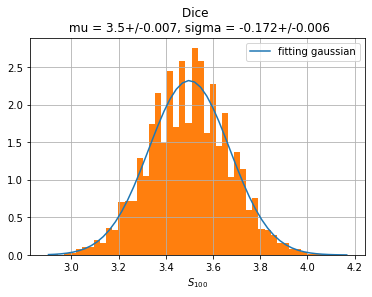

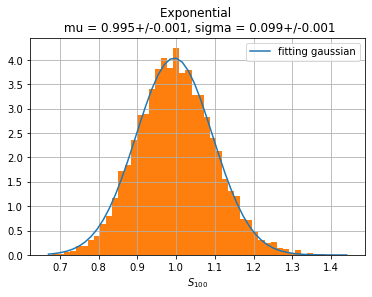

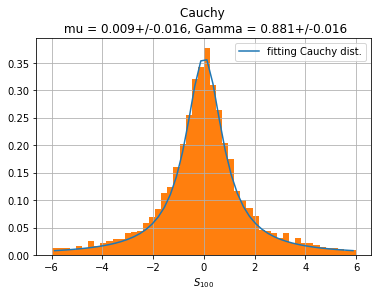

In [18]:
# fit

def Gauss(x,mu,sigma):
   return ( 1/np.sqrt(np.pi*2*sigma**2) )*np.exp(-(x-mu)**2/(2*sigma**2) )

def Cauchy(x,mu,Gamma):
   return (Gamma/np.pi)*1./((x-mu)**2+Gamma**2)

bincenters_d = np.array( [0.5*(binsd[i]+binsd[i+1]) for i in range(len(binsd)-1)] )
bincenters_e = np.array( [0.5*(binse[i]+binse[i+1]) for i in range(len(binse)-1)] )
bincenters_c = np.array( [0.5*(binsc[i]+binsc[i+1]) for i in range(len(binsc)-1)] )

opt_d, p_cov = curve_fit(Gauss, bincenters_d , nd)
nd_fit = Gauss(bincenters_d,opt_d[0],opt_d[1])
plt.plot(bincenters_d,nd_fit,label='fitting gaussian') # plotting fitted function
plt.hist( dice[:,i], n_bins, density=True)
mu =round(opt_d[0],3)
errmu =round(np.sqrt(p_cov[0][0]),3)
sigma =round(opt_d[1],3)
errsigma =round(np.sqrt(p_cov[1][1]),3)
plt.title('Dice \n mu = '+str(mu)+'+/-'+str(errmu)+', sigma = '+str(sigma)+'+/-'+str(errsigma))
plt.legend()
plt.xlabel('$S_{100}$')
plt.grid(True)
plt.show()

opt_e, p_cov = curve_fit(Gauss, bincenters_e , ne)
ne_fit = Gauss(bincenters_e,opt_e[0],opt_e[1])
plt.plot(bincenters_e,ne_fit,label='fitting gaussian') # plotting fitted function
plt.hist( exp[:,i], n_bins, density=True)
plt.legend()
plt.grid(True)
mu =round(opt_e[0],3)
errmu =round(np.sqrt(p_cov[0][0]),3)
sigma =round(opt_e[1],3)
errsigma =round(np.sqrt(p_cov[1][1]),3)
plt.title('Exponential \n mu = '+str(mu)+'+/-'+str(errmu)+', sigma = '+str(sigma)+'+/-'+str(errsigma))
plt.xlabel('$S_{100}$')
plt.show()


bincenters_cut = bincenters_c[(bincenters_c>-6) & (bincenters_c<6)]
n_cut = nc[(bincenters_c>-6) & (bincenters_c<6)]

opt_c, p_cov = curve_fit(Cauchy, bincenters_cut , n_cut)
nc_fit = Cauchy(bincenters_cut,opt_c[0],opt_c[1])
plt.plot(bincenters_cut,nc_fit,label='fitting Cauchy dist.') # plotting fitted function
plt.hist( cl[:,i], n_bins, density=True, range=(-6,6))
plt.legend()
plt.grid(True)
mu =round(opt_c[0],3)
errmu =round(np.sqrt(p_cov[0][0]),3)
gamma =round(opt_c[1],3)
errgamma =round(np.sqrt(p_cov[1][1]),3)
plt.title('Cauchy \n mu = '+str(mu)+'+/-'+str(errmu)+', Gamma = '+str(gamma)+'+/-'+str(errgamma))
plt.xlabel('$S_{100}$')
plt.show()

Le osservazioni e risultati precedenti sono in accordo con il teorema del limite centrale il quale afferma che date le variabili aleatorie $x_i$ i.i.d. con media $\mu$ e m.s.e. $\sigma < + \infty$ allora la distribuzione di $S_N = \frac{1}{N}\sum _{i=0} ^N x_i$ tende a una gaussiana con media $\mu _{S_N} = \mu$ e $\sigma _{S_N} = \sigma /\sqrt{N}$.


Per il dado i paramentri mu e sigma della gaussiana ottenuti nel fit sono compatibili con quelli previsti dal TLC ($\mu _{S_{100}} = 3.5$, $\sigma _{S_{100}} = 0.0171$).
Per l'eponenziale solo il parametro sigma risulta compatibile con quello previsto ($\sigma _{S_{100}} = 0.01$) mentre $\mu _{S_{100}} = 1$  cade fuori dei margini di errore della stima di mu.


Infine non osserviamo lo stesso comportamento nel caso della distribuzione di Cauchy poichè questa distribuzione ha una varianza infinita e quindi non soddisfa le ipotesi del TCL.
Inoltre sappiamo che la distribuzione di Cauchy è una distribuzione stabile ossia $p(x) = p(S_N)\quad\forall N$. Ciò trova riscontro con quanto osservato. 
Dal fit con la Cauchy-Lorentz troviamo un paramentro mu compatiblie con $\mu = 0$ della distribuzione usata per campionare $S_1$, mentre $\Gamma = 1$ della medesima distribuzione cade fuori dalle barre di errore della stima di Gamma. 


## Esercizio 3

E' stato simulato l'esperimento di Buffon utilizzando un'asticella di lunghezza 0.8 e 10 linee orizzontali separate da una distanza 1. Nel generare la posizione di ogni asticella serve
la realizzazione di una variabile aleatoria $\theta$ con distribuzione uniforme in $[0,2\pi)$ che è stata ottenuta generando punti nel piano con distribuzione uniforme nel cerchio unitario. 
Nella simulazione vengono effettuali $8\cdot 10^5$ lanci divisi in $100$ blocchi.
Nella figura seguente si osserva l'andmaento della stima di pi greco con la relativa incertezza in funzione del numero dei lanci. 

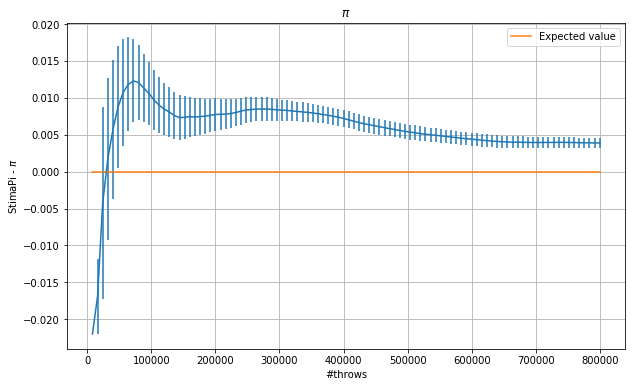

In [21]:
# plot pi

Nthrows, mean, error = np.loadtxt("Pi.dat", usecols=(0,1,2), unpack=True)

plt.figure(figsize=(10,6))
plt.errorbar(Nthrows ,mean-np.pi, yerr=error)
plt.plot(Nthrows, np.zeros(len(Nthrows)), label='Expected value')
plt.legend()
plt.xlabel('#throws')
plt.ylabel('StimaPi - $\pi$')
plt.grid(True)
plt.title('$\pi$')
plt.show()
